# SIT742: Modern Data Science 
**(2020 Assessment Task 01: Exploration for Data Scientists Survey Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Rajeshkumar Ramprasad Mourya
- Student ID:  218615876
- Email:  rmourya@deakin.edu.au
- Lab Session and Tutor (for on campus students): Friday 1 PM, Gang Li

---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 1 - What we could know about the Data Scientists? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***


In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=90103592a2a6bcb7b6b0398cf9d3ca7847dd3b47f4d14bcc11d29abb25667b89
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
from pandas import DataFrame                                                    # Import DataFrame from Pandas library
import wget
import seaborn as sns                                                           # Option: matplotlib too
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv'
DataSet = wget.download(link_to_data)

In [0]:
!ls

ConversionRates.csv  JobPostings.csv  MCQResponses.csv	sample_data


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load MCQResponses.csv into dataframe df_demog, and check the data statistics and general infommation by printing its top 5 rows.
</div>

In [0]:
# Loading data from MCQResponses.csv into df_demog

df_demog = pd.read_csv('MCQResponses.csv')
df_demog.head()                                                                 # print top five rows of df_demog

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


<div class="alert alert-block alert-info">

**Code**: 
    Check which columns have NAs (don't remove them now), and for each of those columns, display how many records with values (namely, no NULL values)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.A** Please include your result for this coding task into your report, with proper section title '1.0.A'.
</div>
    </div>




In [0]:
# Check columns with NAs
    df_demog.isna().any()   # isna() provide detailed values stating where value is NA or not
                            # isna().any() provide column which contains at least one NA entry
                            # True signifies presence of null value


GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool

In [0]:
# Count function displays number of no null values in columns of dataframe

df_demog.count()

GenderSelect                    4327
Country                         4327
Age                             4327
EmploymentStatus                4327
CodeWriter                      4327
CurrentJobTitleSelect           4327
TitleFit                        4251
CurrentEmployerType             4275
MLToolNextYearSelect            4206
MLMethodNextYearSelect          4170
LanguageRecommendationSelect    4228
FormalEducation                 4327
MajorSelect                     3952
FirstTrainingSelect             4324
CompensationAmount              4327
CompensationCurrency            4327
JobSatisfaction                 4317
dtype: int64

<div class="alert alert-block alert-info">

**Code**: 
    Select the users whose current job title is 'Data Scientist', and store into variable df_demog_ds    

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.B** Please include your result of `how many Data Scientists?' into your report, with proper section title  '1.0.B'.
</div>
</div>




In [0]:
# Select Data Scientist from column CurrentJobTitleSelect in df_demog and store into df_demog_ds

df_demog_ds = df_demog.loc[df_demog['CurrentJobTitleSelect']
                           == 'Data Scientist']                                 # df.loc to find "Data Scientists"
df_demog_ds.head()                                                              # Output top 5 rows

count_DataScientist = len(df_demog_ds)
print("Number of Data Scientists :", count_DataScientist)


Number of Data Scientists : 1263


### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-info">

**Code**: 
    Plot and display as text output the number and percentage of data scientist with each type of formal education. 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1** Please include your running result of this coding task into your report, with proper section title  '1.1'.
</div>
</div>

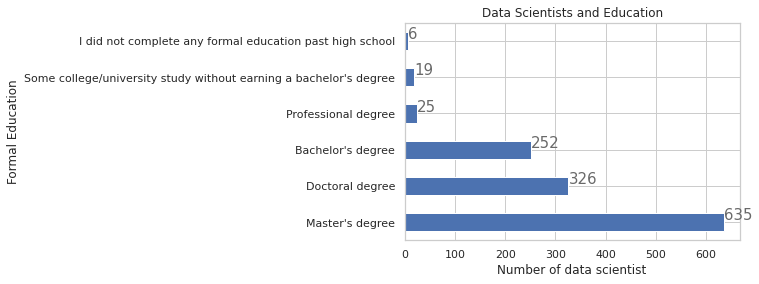

In [0]:
#plt.title and ax.set_title can be used alternately depending on type of plot we code

ax = df_demog_ds['FormalEducation'].value_counts().plot(kind = 'barh')          # Horizontal Bar Graph plot
ax.set_title("Data Scientists and Education")                                   # Set title of Graph                           
ax.set_ylabel("Formal Education")
ax.set_xlabel("Number of data scientist")

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), 
            fontsize=15, color='dimgrey')                                       #Add text using width of the bars

### 1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors.

In [0]:
# 1.2 Salary
df_conversion = pd.read_csv('ConversionRates.csv')    # load Conversion data

key1 = df_demog_ds['CompensationCurrency']            # key from MCQ file
key2 = df_conversion['originCountry']                 # key from Coversion file

result = pd.merge(df_demog_ds, df_conversion, 
                  left_on = key1, right_on = key2 )   # Merge MCQ and Conversion data using columns with common value

x = df_conversion.loc[(df_conversion['originCountry']) == 'AUD',
                      'exchangeRate']                 
xAUD = x[7]                                           # Coversion rate of USD to AUD assigned

result['SalaryAUD'] = (result['CompensationAmount'] 
                       * result['exchangeRate']) / xAUD
result.head()

,key_0,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,Unnamed: 0,originCountry,exchangeRate,SalaryAUD
0,INR,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,3,INR,0.01562,1849.534469
1,INR,Male,India,29,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,Python,Bayesian Methods,R,Master's degree,Computer Science,University courses,120000.0,INR,7,3,INR,0.01562,2336.254066
2,INR,Male,India,25,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,C/C++,Deep learning,R,Bachelor's degree,Other,Work,1200000.0,INR,8,3,INR,0.01562,23362.540664
3,INR,Male,India,28,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,1300000.0,INR,5,3,INR,0.01562,25309.419052
4,INR,Male,India,31,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,IBM Watson / Waton Analytics,Neural Nets,R,Master's degree,Engineering (non-computer focused),Work,1400000.0,INR,7,3,INR,0.01562,27256.297441


<div class="alert alert-block alert-info">

**Code**: 
Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.A** In your report's section '1.2.A', answer what is the maximum and the median salary in AUD (this is for all respondents). 
</div>
</div>


In [0]:
medianSalary = result['SalaryAUD'].median()                                     # Default function to find median of series

print("Median salary of Data Scientists (in AUD) is : ", 
      round(medianSalary))                                                      # Rounded Median Salary readability

Median salary of Data Scientists (in AUD) is :  88829


In [0]:
maxSalary = result['SalaryAUD'].max()

print("Maximum salary of Data Scientists (in AUD) is : ", 
      round(maxSalary))                                                         # Round Max salary for readability

Maximum salary of Data Scientists (in AUD) is :  742711


<div class="alert alert-block alert-info">

**Code**: 
Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.
   
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.B** In your report's section '1.2.B', answer what is the maximum and median salary in AUD for Australian respondents, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [0]:

AusSalary = result.loc[result['Country'] == 'Australia']                        # Assign Australia's data of DS 

medianAus = AusSalary['SalaryAUD'].median()                                     # Calculate Median
print("Median salary of Australian Data Scientists (in AUD) is : ",
      round(medianAus))

maxAus = AusSalary['SalaryAUD'].max()                                           # Calculate Max
print("Maximum salary of Australian Data Scientists (in AUD) is : ",
      round(maxAus))                                                            # Results rounded for readability

Median salary of Australian Data Scientists (in AUD) is :  140000
Maximum salary of Australian Data Scientists (in AUD) is :  350000


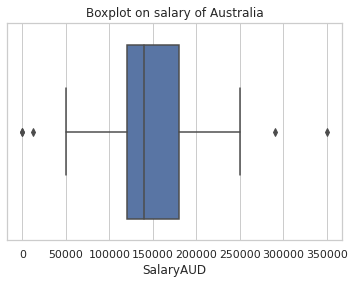

In [0]:
# Box Plot of Australian Salaries

plt.title("Boxplot on salary of Australia")
ax = sns.boxplot(x = AusSalary["SalaryAUD"])

<div class="alert alert-block alert-info">

**Code**: 
There are some outliers in the Australian salary plot. You are required to filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.C** In your report's section '1.2.C', answer what is the new maximum and median salary in AUD for Australian respondents after filtering, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [0]:
condition1 = AusSalary['SalaryAUD'] > 40000                                     # Conditions as specified above
condition2 = AusSalary['SalaryAUD'] < 250000

newSalary = AusSalary[condition1 & condition2]                                  # Assigned new salaries to variable

newMedian = newSalary['SalaryAUD'].median()                                     # Calculate Median
print("New Median salary of Australian Data Scientists (in AUD) is : "
      , round(newMedian))

newMax = newSalary['SalaryAUD'].max()                                           # Calculate Mean
print("New Maximum salary of Australian Data Scientists (in AUD) is : "
      , round(newMax))                                                          # Results rounded off for readability

New Median salary of Australian Data Scientists (in AUD) is :  138000
New Maximum salary of Australian Data Scientists (in AUD) is :  200000


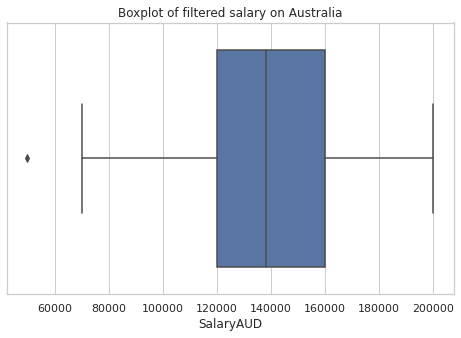

In [0]:
# Box Plot for new salary data

plt.figure(figsize=(8,5))                                                       # figsize() to adjust height and width
ax = sns.boxplot(x = newSalary["SalaryAUD"])
plt.title("Boxplot of filtered salary on Australia")
plt.show()                                                                      # Use Plt.Show to remove other text 


### 1.3. Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
You will need to build a boxplot to explore the age of all data scientists. 
Your plot must have a label for each axis, a tittle and also show the outliers.

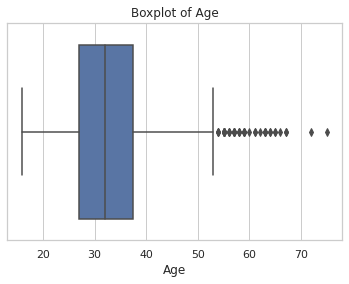

In [0]:
plt.title("Boxplot of Age")

ax = sns.boxplot(x = df_demog_ds["Age"])


<div class="alert alert-block alert-info">

**Code**: 
        <ol>
        <li> Calculate the five number summary descriptive statistics for age as shown on the boxplot, as well as the mean. Please round your mean to integer.</li>
        <li> Regardless of the errors that the data show, we are interested in working-age data scientists, how many aged between 24 and 60. </li>
        <li> How many respondents were under 18?</li>
    </ol>
    

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.A** In your report's section '1.3.A', answer 
        <ol>
        <li> What is the mean age of all data scientists? </li>
        <li> What is the median age of all data scientists? </li>
        <li> how many data scientists aged between 24 and 60</li>
        <li> how many respondents were under 18? </li>
    </ol>
</div>
</div>







In [0]:
# Calculate five number summary

quartiles = np.percentile(df_demog_ds['Age'], [25,50,75])                       # Calculate 25%, 50% and 75% quarters

min_age = df_demog_ds['Age'].min()
max_age = df_demog_ds['Age'].max()
mean_age = round(df_demog_ds['Age'].mean())                                     # Mean Rounded off

print("**** Five Point summary ****")
print("Minimum Age : ", min_age)
print("Mean Age : ", mean_age)
print(" Q1 (25%) : ", quartiles[0])
print(" Q2 (50%) : ", quartiles[1])
print(" Q3 (75%) : ", quartiles[2])
print("Maximum Age : ", max_age)



**** Five Point summary ****
Minimum Age :  16
Mean Age :  34
 Q1 (25%) :  27.0
 Q2 (50%) :  32.0
 Q3 (75%) :  37.5
Maximum Age :  75


In [0]:
# Code to Calculate Mean Age

AgeMean = df_demog_ds['Age'].mean()
print("Mean Age is :" ,AgeMean)


Mean Age is : 33.72050673000792


In [0]:
# Code to calculate Median Age

AgeMedian = df_demog_ds['Age'].median()
print("Median Age is :" ,AgeMedian)


Median Age is : 32.0


In [0]:
# Your code: How many data scientsits aged between 24 and 60

lessthan = df_demog_ds['Age'] > 23
morethan = df_demog_ds['Age'] < 61

ageCount = df_demog_ds[lessthan & morethan]
x = len(ageCount)

print("Number of data scientists between age 24 and 60 : ", x)

Number of data scientists between age 24 and 60 :  1188


In [0]:
# Your Code: how many respondents under 18?

lessthan18 = df_demog_ds['Age'] < 18

agebelow = df_demog_ds[lessthan18]
#below18 = agebelow['Age'].count()
below18 = len(agebelow)
print("Number of data scietist under 18: ", below18)

Number of data scietist under 18:  1


#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Code**: 
Plot the gender distribution of the data scientist users using a bar chart. 
</div>


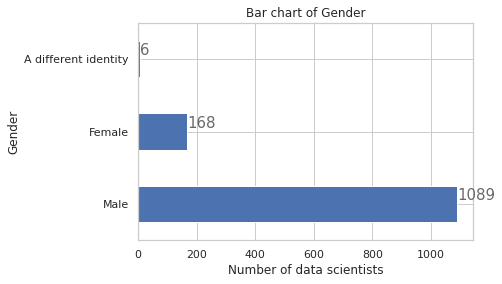

In [0]:
plt.title("Bar chart of Gender")

ax = df_demog_ds['GenderSelect'].value_counts().plot(kind = 'barh')
ax.set_ylabel("Gender")
ax.set_xlabel("Number of data scientists")

for i in ax.patches:
    
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), 
            fontsize=15, color='dimgrey')                                       # get_width pulls left or right; get_y pushes up or down

Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

Text(0.5, 0, 'Gender')

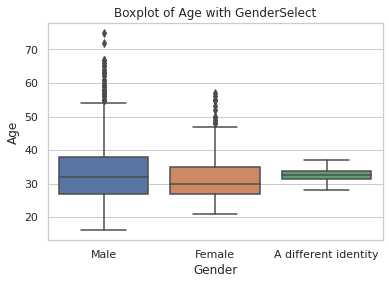

In [0]:
plt.title("Boxplot of Age with GenderSelect")

ax = sns.boxplot( y = df_demog_ds["Age"], 
                 x = df_demog_ds["GenderSelect"] )

ax.set_xlabel('Gender')

<div class="alert alert-block alert-info">

**Code**: 
You are required to use the barchart to show the percentage of men, women and other identity.
    
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.B** In your report's section '1.3.B', include the bar chart generated from your code.
</div>
</div>

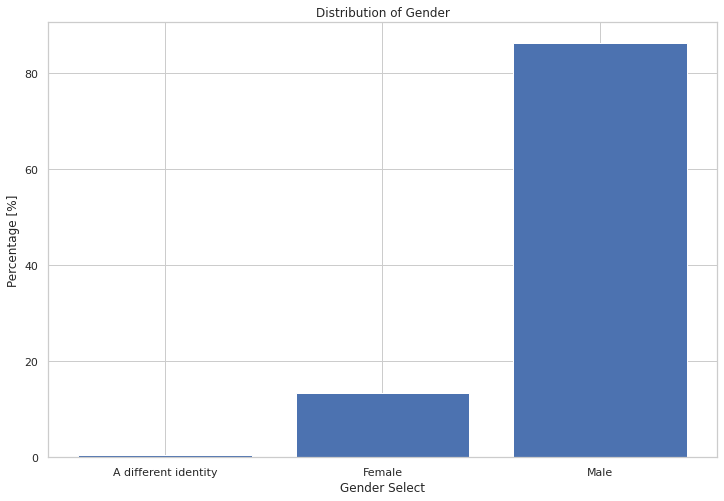

In [0]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Gender')

plt.xlabel('Gender Select')                                                     
plt.ylabel('Percentage [%]')

GenderData = df_demog_ds.groupby("GenderSelect").size().reset_index(name='Count') # Use GroupBy on size/count to find
                                                                                  # Count of each gender
totalCount = len(df_demog_ds)                                                     # total count
Gender = GenderData['GenderSelect']
percentage = (GenderData['Count'] / totalCount) * 100                             # Convert into percentage

plt.bar(Gender, percentage)                                                       # Bar Plot
plt.show()
 

#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div class="alert alert-block alert-info">

**Code**: 
Find the top 5 countries of data scientists.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.C** In your report's section '1.3.C', answer what are those top 5 countries and their corresponding number of data scienists
</div>
</div>

In [0]:
CountryData = df_demog_ds.groupby("Country").size().reset_index(name='Count')   # Find Country and number of employees
df_country = CountryData.sort_values('Count', ascending=False)                  # Descending sort
df_country.head()                                                               # To find top 5 countries

,Country,Count
50,United States,414
17,India,111
12,France,60
49,United Kingdom,55
13,Germany,50


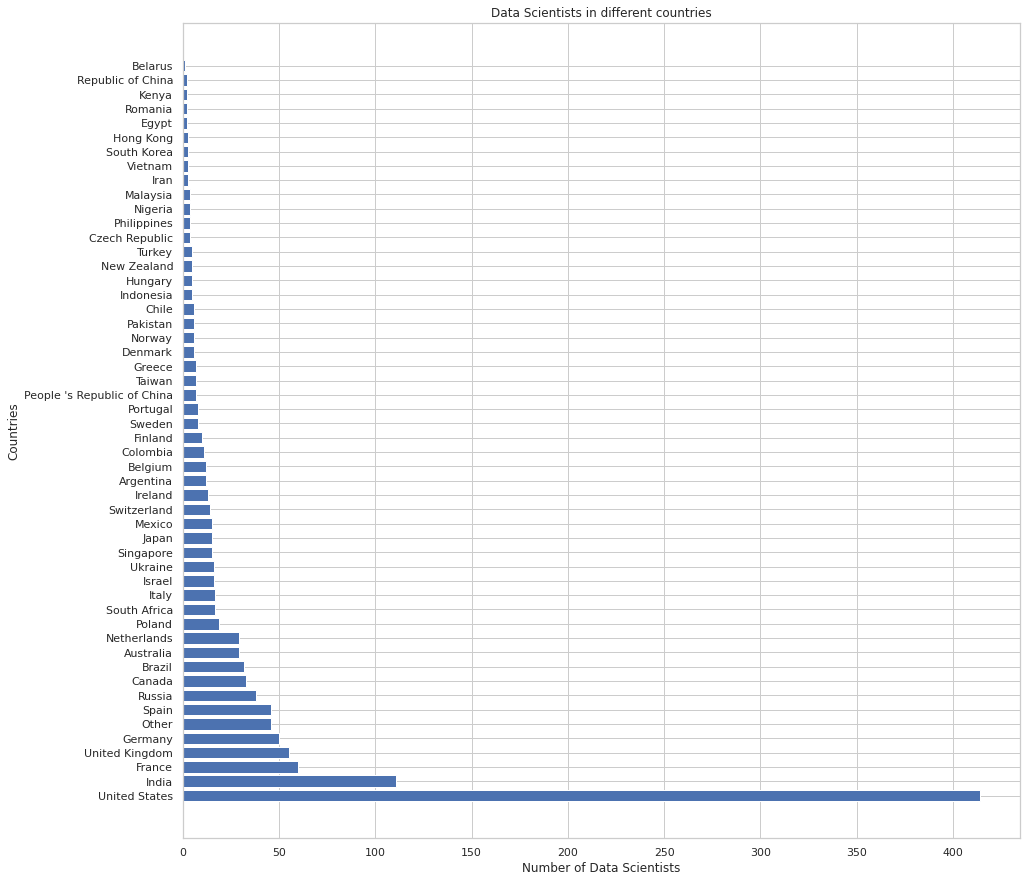

In [0]:
# Show only one suitable plot of country: either Bar plot, count plot, or Boxplot (possible or not?)

plt.figure(figsize=(15,15))
plt.barh(df_country['Country'], df_country['Count'], align='center')            # Horizontal plot for better visibility

plt.title("Data Scientists in different countries")
plt.xlabel('Number of Data Scientists')
plt.ylabel('Countries')
plt.show()

<div class="alert alert-block alert-info">

**Code**: 
Generate the distribution of top 5 countries of data scientists, using percentage barchart. You can not mannually input the name of top 5 countries (your code should not contain any name of the top 5 countries), and you are required to use python subset functions or many other functions.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.D** In your report's section '1.3.D', including the percentage barchart of those top 5 countries. Here the percentage is calculated based on all countries, not for those top 5 countries. So the sum of top 5 countries' percentage should be less than 1.
</div>
</div>

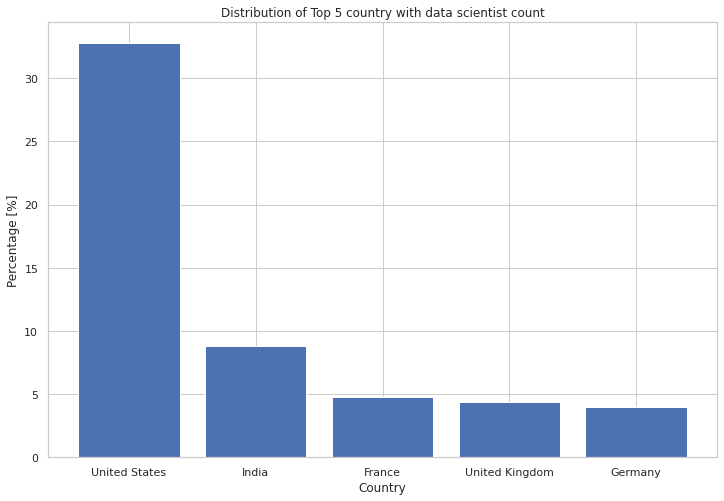

In [0]:
#percentage
plt.figure(figsize=(12,8))
plt.title('Distribution of Top 5 country with data scientist count')            

df_country_top5 = df_country.head()                                             # Head() function to assign top 5 values

countries = df_country_top5['Country']                                          # X values
percentage = (df_country_top5['Count'] / totalCount) * 100                      # Y values

plt.bar(countries, percentage)
plt.xlabel('Country')
plt.ylabel('Percentage [%]')
plt.show()

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

<div class="alert alert-block alert-info">

**Code**: 
You are required to output the mean and median age for each gender for the United States, India, Australia, Pakistan


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.E** In your report's section '1.3.E', including the results of above coding task.
</div>
</div>




In [0]:

df_CAG = df_demog_ds.loc[ df_demog_ds['Country']
                                      .isin(['United States', 'India', 
                                             'Australia', 'Pakistan'])]         # Filter required data

df_countryAgg = df_CAG.groupby(["Country",                         
                                "GenderSelect"]).agg({'Age': ['mean', 
                                                              'median']})       # Aggregrate post grouping of
                                                                                # Country and Gender
df_countryAgg                                                                   # Display Data

Age       
                                         mean median
Country       GenderSelect                          
Australia     Female                32.600000     31
              Male                  35.000000     34
India         Female                29.000000     27
              Male                  30.019802     28
Pakistan      Male                  32.000000     27
United States A different identity  31.000000     31
              Female                33.436620     31
              Male                  35.649123     33

## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [0]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')                                     # For generating tags ex. JJ, DT etc.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
df_text = pd.read_csv('JobPostings.csv')                                        # Load Data    

<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>
</div>


In [0]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())                                                  # lowercase description to 'list'
Rawdata = ' '.join([str(elem) for elem in lower])                               # Convert list to string
tokens = []

stop_words = set(stopwords.words('english'))                                    # Load English stopwords
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")                                 # Use Regular expressions

def tokenizeLowerData (lower):                                                  # Custom Tokenizer Function
    tokens = tokenizer.tokenize(lower)                                          # Tokenized data
    filtered_tokens = [token for token in tokens if token not in stop_words]    # Exclude stop_words
    return filtered_tokens



Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>
</div>




In [0]:
# Your Code
# find top common words with document frequencies > 6000
# you may use function FreqDist() and sort()


frequent_words = FreqDist(sorted(tokenizeLowerData(Rawdata)))                   # Find frequency of distinct words

freq6000 = []

for word, frequency in sorted(frequent_words.most_common()):
    if(frequency > 6000) :
      freq6000.append((word, frequency))                                        # append words in list if freq > 6000

In [0]:
freq6000                                                                        # Show list with words of freq > 6000

[('ability', 15686),
 ('across', 7189),
 ('advanced', 10627),
 ('algorithms', 9070),
 ('analysis', 20628),
 ('analytical', 8872),
 ('analytics', 21846),
 ('apply', 6203),
 ('big', 6626),
 ('build', 8212),
 ('business', 33571),
 ('company', 8999),
 ('complex', 8938),
 ('computer', 9676),
 ('customer', 6852),
 ('data', 124649),
 ('degree', 11338),
 ('design', 8759),
 ('develop', 11548),
 ('development', 12751),
 ('e', 6808),
 ('employment', 6696),
 ('engineering', 10141),
 ('environment', 8551),
 ('etc', 8308),
 ('experience', 59165),
 ('field', 7453),
 ('help', 7716),
 ('including', 10842),
 ('information', 11852),
 ('insights', 8911),
 ('job', 12292),
 ('knowledge', 13232),
 ('large', 7548),
 ('learning', 26867),
 ('machine', 20485),
 ('management', 9949),
 ('methods', 7110),
 ('modeling', 11045),
 ('models', 16559),
 ('must', 6196),
 ('new', 12688),
 ('one', 6038),
 ('opportunities', 6064),
 ('opportunity', 9432),
 ('people', 7561),
 ('position', 9341),
 ('predictive', 8202),
 ('prefe

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>
</div>






In [0]:
# Your Code to sort and display the top 10 high fequency words in 'freq6000'


df_freq6000 = pd.DataFrame(freq6000, columns = ['Word', 'Frequency'])           # Assign frequency data to a dataframe
df_freq6000 = df_freq6000.sort_values('Frequency', ascending = False)           # Sort dataframe in descending order
df_freq6000.head(10)                                                            # Top 10 words output

,Word,Frequency
15,data,124649
25,experience,59165
10,business,33571
90,work,28160
66,science,26875
34,learning,26867
6,analytics,21846
79,team,20729
4,analysis,20628
35,machine,20485


Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>
</div>







In [0]:
token_Words = FreqDist(sorted(tokenizeLowerData(Rawdata)))
print(list(nltk.bigrams(token_Words)))                                          # Print Bi-Grams

[('0', '0-01'), ('0-01', '0-01obsidian'), ('0-01obsidian', '0-1'), ('0-1', '0-10'), ('0-10', '0-2'), ('0-2', '0-3'), ('0-3', '0-33'), ('0-33', '0-4'), ('0-4', '0-5'), ('0-5', '00'), ('00', '000'), ('000', '000-mile'), ('000-mile', '000-plus'), ('000-plus', '000-route'), ('000-route', '000-square'), ('000-square', '0000'), ('0000', '000000'), ('000000', '00001027'), ('00001027', '0000201286-01'), ('0000201286-01', '0000202801-01'), ('0000202801-01', '0000385181'), ('0000385181', '0000389237'), ('0000389237', '0001'), ('0001', '0001725038-01'), ('0001725038-01', '0001738663-01'), ('0001738663-01', '0003'), ('0003', '00033746422'), ('00033746422', '00034044421'), ('00034044421', '00034174161'), ('00034174161', '00034665451'), ('00034665451', '00052731'), ('00052731', '00053132'), ('00053132', '00053166'), ('00053166', '00053865'), ('00053865', '0006384751-01'), ('0006384751-01', '0006384821-01'), ('0006384821-01', '0006385009-01'), ('0006385009-01', '0006395676-01'), ('0006395676-01', '00